In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

ais_train = pd.read_csv("../Datasets/ais_train.csv", delimiter="|")
ais_test = pd.read_csv("../Datasets/ais_test.csv", delimiter="|")
vessels = pd.read_csv("../Datasets/vessels.csv", delimiter="|")
schedules = pd.read_csv("../Datasets/schedules_to_may_2024.csv", delimiter="|")
ports = pd.read_csv("../Datasets/ports.csv", delimiter="|")

In [3]:
ports.head()

,portId,name,portLocation,longitude,latitude,UN_LOCODE,countryName,ISO
0,61d36ed80a1807568ff9a064,Port of Algiers,Algiers,3.067222,36.773611,DZALG,Algeria,DZ
1,61d36ed80a1807568ff9a065,Port of Annaba,Annaba,7.772500,36.900556,DZAAE,Algeria,DZ
2,61d36edf0a1807568ff9a070,Port of Oran,Oran,-0.639722,35.712222,DZORN,Algeria,DZ
3,61d36ee00a1807568ff9a072,Port of Skikda,Skikda,6.905833,36.887500,DZSKI,Algeria,DZ
4,61d36ee10a1807568ff9a074,Port of Pago-Pago,Pago-Pago,-170.690556,-14.274167,ASPPG,American Samoa,AS


In [4]:
vessels.head()

,shippingLineId,vesselId,CEU,DWT,GT,NT,vesselType,breadth,depth,draft,enginePower,freshWater,fuel,homePort,length,maxHeight,maxSpeed,maxWidth,rampCapacity,yearBuilt
0,61a8e672f9cba188601e84ab,61e9f38eb937134a3c4bfd8b,6500,21200.0,58684,17606.0,83.0,32.0,22.20,NaN,0.0,NaN,NaN,OSLO,199.00,5.0,18.6,15.2,150.0,2000
1,61ec94f1a8cafc0e93f0e92a,61e9f38eb937134a3c4bfd8d,4902,12325.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,MONROVIA,182.00,NaN,NaN,NaN,NaN,2006
2,61e213d5d612676a0f0fb755,61e9f38eb937134a3c4bfd8f,5000,13059.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,SAINT JOHN'S,182.00,NaN,NaN,NaN,NaN,2010
3,61be24574ea00ae59d0fe388,61e9f38eb937134a3c4bfd91,4200,12588.0,39362,NaN,83.0,28.0,NaN,NaN,11060.0,NaN,NaN,NaN,167.00,NaN,NaN,NaN,NaN,2011
4,61a8e673f9cba188601e84ae,61e9f390b937134a3c4bfd93,7450,21052.0,75528,24391.0,83.0,37.2,22.23,NaN,13140.0,491.47,3236.78,Panama,199.98,NaN,NaN,NaN,NaN,2018


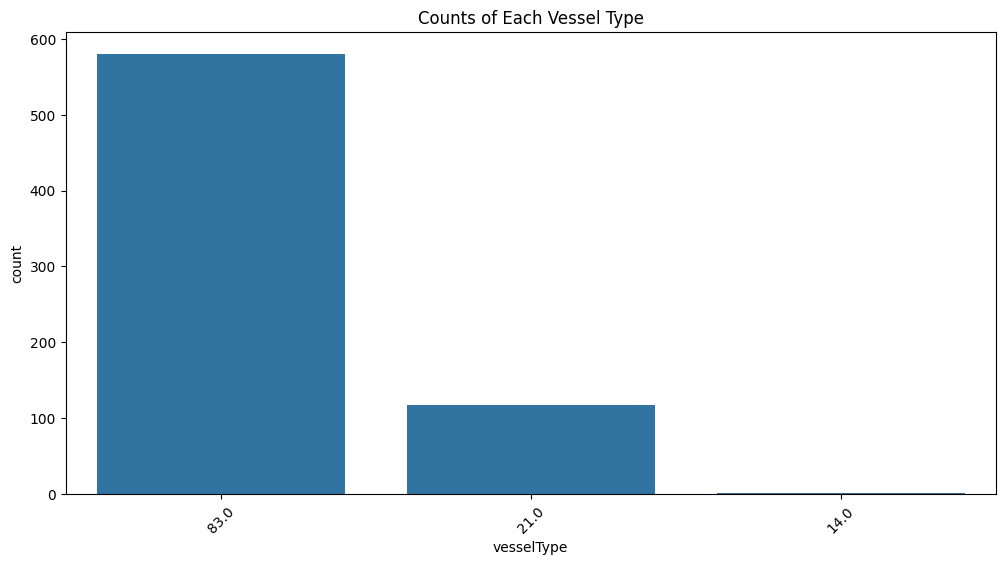

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=vessels, x='vesselType', order=vessels['vesselType'].value_counts().index)
plt.title('Counts of Each Vessel Type')
plt.xticks(rotation=45)
plt.show()

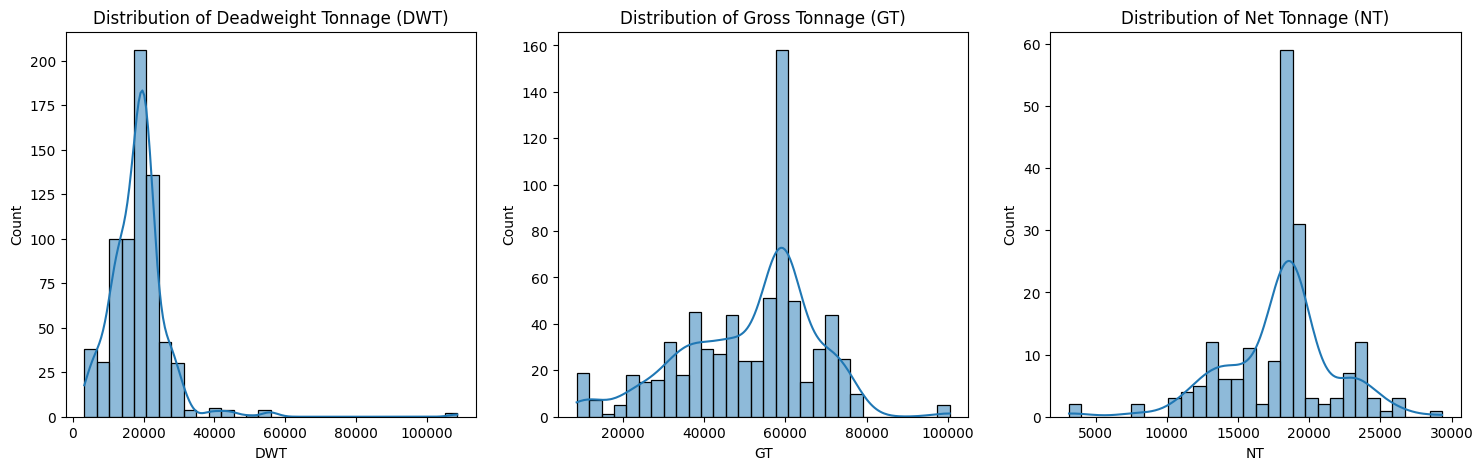

In [6]:
# Plotting distributions of vessel tonnage (DWT, GT, NT)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(vessels['DWT'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Deadweight Tonnage (DWT)')
sns.histplot(vessels['GT'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Gross Tonnage (GT)')
sns.histplot(vessels['NT'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Net Tonnage (NT)')
plt.show()

In [7]:
schedules.head()

,vesselId,shippingLineId,shippingLineName,arrivalDate,sailingDate,portName,portId,portLatitude,portLongitude
0,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-02 00:00:00+00:00,2023-10-03 00:00:00+00:00,Port of Brunswick,61d38499b7b7526e1adf3d54,31.140556,-81.496667
1,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-27 00:00:00+00:00,2023-10-27 00:00:00+00:00,Port of Southampton,61d3832bb7b7526e1adf3b63,50.902500,-1.428889
2,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-19 00:00:00+00:00,2023-10-20 00:00:00+00:00,Port of Bremerhaven,61d375e793c6feb83e5eb3e2,53.563611,8.554722
3,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-09 00:00:00+00:00,2023-10-10 00:00:00+00:00,Port of New York,61d38481b7b7526e1adf3d23,40.688333,-74.028611
4,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-09-25 00:00:00+00:00,2023-09-26 00:00:00+00:00,Manzanillo International Terminal,61d37d0199db2ccf7339eee1,9.372370,-79.879790


In [8]:
ais_train.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3


In [9]:
ais_test.head()

,"ID,vesselId,time,scaling_factor"
0,"0,61e9f3aeb937134a3c4bfe3d,2024-05-08 00:03:16..."
1,"1,61e9f473b937134a3c4c02df,2024-05-08 00:06:17..."
2,"2,61e9f469b937134a3c4c029b,2024-05-08 00:10:02..."
3,"3,61e9f45bb937134a3c4c0221,2024-05-08 00:10:34..."
4,"4,61e9f38eb937134a3c4bfd8d,2024-05-08 00:12:27..."


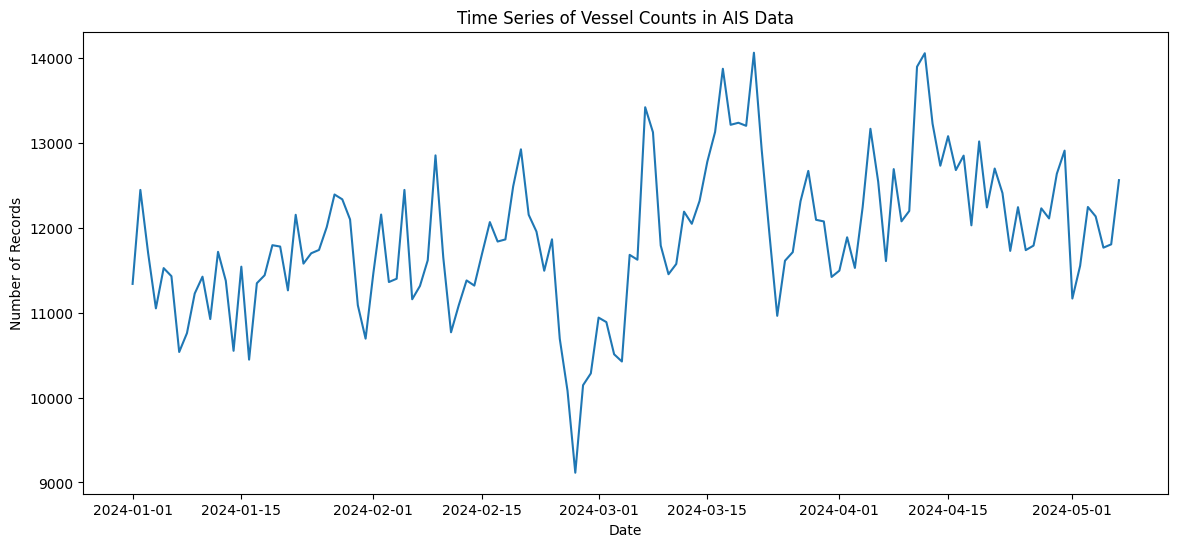

In [10]:
# Converting TIME column to datetime and plotting a time series
ais_train['time'] = pd.to_datetime(ais_train['time'], errors='coerce')
ais_train['date'] = ais_train['time'].dt.date
daily_counts = ais_train.groupby('date').size()

# Plotting the time series of vessel counts
plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title('Time Series of Vessel Counts in AIS Data')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.show()

navstat
0     782099
5     605831
1     129515
2       2081
8        948
15       670
6        521
4        232
3        161
11         2
12         1
13         1
14         1
7          1
9          1
Name: count, dtype: int64


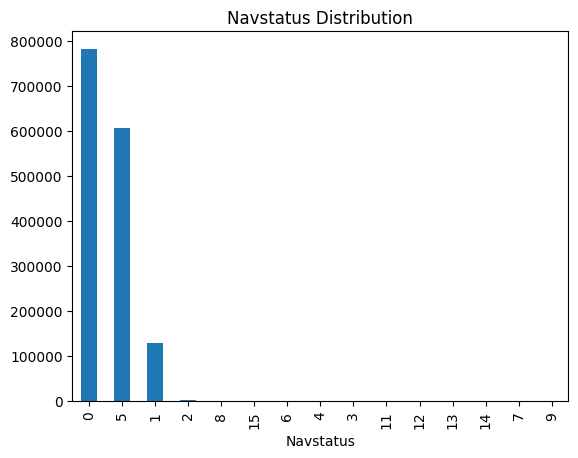

In [17]:

# Navstatus distribution

ais_train['navstat'].value_counts().plot(kind='bar')
plt.title('Navstatus Distribution')
plt.xlabel('Navstatus')

print(ais_train['navstat'].value_counts())


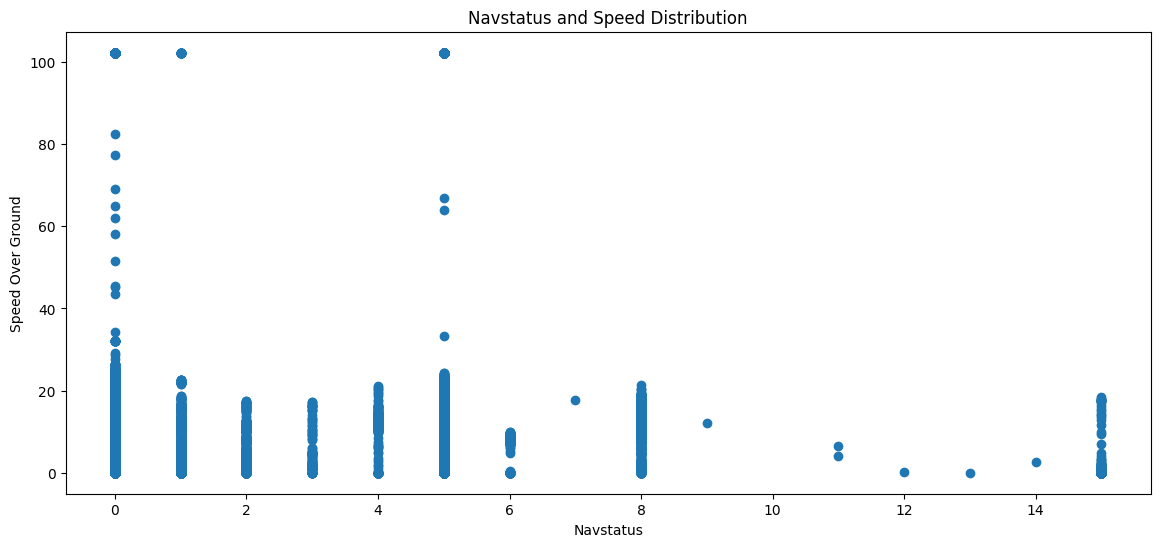

In [21]:
# navstat and speed distribution (navstat and sog)
plt.figure(figsize=(14, 6)) 

plt.scatter(ais_train['navstat'], ais_train['sog'])

plt.title('Navstatus and Speed Distribution')
plt.xlabel('Navstatus')
plt.ylabel('Speed Over Ground')
plt.show()


